Question: 3 Lost in the closet (Classification)
You are an artist who secluded yourself for years to come up with the perfect design for a new brand
of clothes. However, your time off from civilisation was not so beneficial since you cannot distinguish
a T-shirt from a dress or a sneaker from a sandal any more. In order to address that issue, you choose
to train a Convolutional Neural Network (using PyTorch) that will help you identify each cloth to
match the perfect design you created. In order to train it, you decide to rely on the dataset fashion
MNIST (https://github.com/zalandoresearch/fashion-mnist).

In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import random

train_set = torchvision.datasets.FashionMNIST(root = ".", train=True,
download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train=False,
download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

# fix the seed to be able to get the same randomness across runs and hence reproducible outcomes
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
# if you are using CuDNN , otherwise you can just ignore
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

Label is: 3
Dimension of input data: torch.Size([32, 1, 28, 28])
Dimension of labels: torch.Size([32])


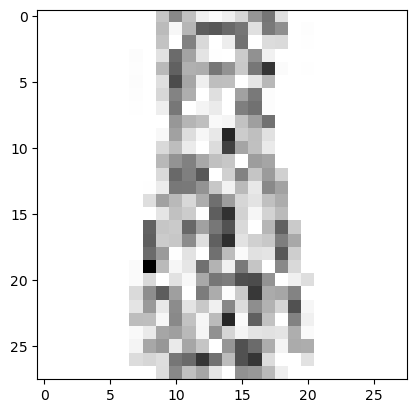

In [2]:
input_data, label = next(iter(train_loader))
plt.imshow(input_data[0,:,:,:].numpy().reshape(28,28), cmap="gray_r");
print("Label is: {}".format(label[0]))
print("Dimension of input data: {}".format(input_data.size()))
print("Dimension of labels: {}".format(label.size()))

Question 2: Create and train a Convolutional Neural Network corresponding to the following architecture
1. Input image size: 28 × 28 × 1 (height × width × number of channels).
2. First convolutional layer: Kernel size (5 × 5), Stride size (1 × 1) and 32 output channels.
Activation function.
3. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
4. Second convolutional layer: Kernel size (5×5), Stride size (1 × 1) and 64 output channels.
Activation function.
5. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
26. First fully-connected layer with input size being the output size of max pooling layer in 5.
(flattened, i.e. 1024) and output size 1024. Activation function.
7. Second fully-connected layer with input size being the output size of fully connected layer in
6. (i.e. 1024) and output size 256. Activation function.
8. Output layer with input size being the output size of fully-connected layer in 7. (i.e. 256)
and output size 10.
For training, initialise your weights using the Xavier Uniform initialisation, use ReLU as the
activation function, a learning rate of 0.1 with the SGD optimiser. You will train your neural
network for 30 epochs.

In [3]:
# CNN implementation

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        # Parameters to input to nn.Conv2d as specified in the task
        #Input Image Size: 28 x 28 x 1 (height x width x number of channels)
        #First convolutional layer: Kernel size (5 × 5), Stride size (1 × 1) and 32 output channels.
        # 1: number of input channels (1 for the images of the FashionMNIST dataset)
        # 2: number of output channels
        # 3: kernel dimensionality (1 dimension if both dimensions are the same)
        # 4: stride dimensionality (1 dimension if both dimensions are the same)
        # self.conv = nn.Conv2d(1, 32, kernel_size=5, stride=1)
        
        # activation function as specified in the task
        # self.act_conv = nn.ReLU()
        '''
        The output of the convolutional operation goes through an activation function, ReLU (Rectified Linear Unit).
        Output Dimension Calculation: (28-5+1)/1 x 28-5+1)/1 x  32= 24 x 24 x 32
        The formula (input_size - kernel_size + 1) / stride_size is used to calculate the spatial 
        The first convolutional layer takes an input image of size 28 x 28 x 1, applies 32 filters of size 5 x 5 with a stride of 1, 
        passes the result through an activation function, and produces an output 24 x 24 x 32. 
        Each channel in the output represents a different feature learned
        '''

        # Parameters to input to nn.MaxPool2d as specified in the task
        #Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
        # 1: kernel dimensionality (1 dimension if both dimensions are the same)
        # 2: stride dimensionality (1 dimension if both dimensions are the same)

        # self.max_pool = nn.MaxPool2d(2, stride=2)
        '''
        Output Dimension Calculati4n: (24-2+2)/2 x (24-2+2)/2 x 32 =12 x 12 x 32
        In summary, the MaxPooling layer is applied to the output of the previous convolutional layer. It reduces the spatial dimensions (height and width) 
        by selecting the maximum value in each 2 x 2 neighborhood.
        The number of channels remain same 32
        '''
        # Parameters to input to nn.Conv2d
        #. Second convolutional layer: Kernel size (5×5), Stride size (1 × 1) and 64 output channels.
        # 1: the first input parameter specifies the number of output channels from the previous layer (i.e. 12)

        # self.conv1 = nn.Conv2d(32, 64, kernel_size=5, stride=1)
        # self.act_conv1 = nn.ReLU()
        # self.max_pool1 = nn.MaxPool2d(2, stride=2)
        '''
        Max pooling layer: Kernel size (2 X 2) and Stride size (2 x 2). Output dimension:
        (8-2+2)/2 x (8-2+2)/2 x 64 =4 x 4 x 64
         First fully-connected layer with input size being the output size of max pooling layer in 5.
        (flattened, i.e. 1024) and output size 1024. Activation function.
        4*4*64=1024
        Second fully-connected layer with input size being the output size of fully connected layer in
        (i.e. 1024) and output size 256. Activation function 
        Output layer with input size being the output size of fully-connected layer in 7. (i.e. 256)
        and output size 10
        '''
        # alternatively use the Sequential container to run layers sequentially
        self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size=5, stride=1), nn.ReLU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size=5, stride=1), nn.ReLU(), nn.MaxPool2d(2, stride=2))
        # Parameters to input to nn.Linear
        # 1: last output dimension of the previous layer
        # Note: if previous layer is a CNN or a MaxPool layer the dimension is the one of the flattened output
        # Note: we keep the batch_size dimension constant in the network
        # for example, 32 x 4*4*64(batch_size x (4*4*64) feature matrix) -> 32 x4*4*64=32*1024
        # 2: output dimension

        # self.fc = nn.Linear(1024, 1024)
        # self.act = nn.ReLU()

        # self.fc1 = nn.Linear(1024, 256)
        # self.act1 = nn.ReLU()

        # self.fc2 = nn.Linear(256, 10)

        # alternatively use the Sequential container to run layers sequentially        
        self.fcc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU(), nn.Linear(1024,256), nn.ReLU(), nn.Linear(256, 10))

    def forward(self, x):
        # pass input via the CNN layers
        x = self.cnn_model(x)
        # reshape the output to a 1D tensor
        x =x.view(x.size(0), -1)
        #pass the reshaped tensor through the fully connected layers
        x = self.fcc_model(x)
        return x

In [4]:
def evaluation(dataloader):
    # initialize variables to keep track of total and correctly classified samples
    total, correct = 0, 0
    
  # turn on evaluate mode, this de-activates certain modes such as dropout
    net.eval()
    
    for data in dataloader:
        # fetch inputs and labels from the data
        inputs, labels = data
        
        # move inputs and labels to the device (e.g., GPU)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # forward pass through the network to get outputs
        outputs = net(inputs)
        # we take the index of the class that received the highest value
        # we take outputs.data so that no backpropagation is performed for these outputs
        # the index of the class with the highest output value
        _, pred = torch.max(outputs.data, 1)
        
        # update the total count with the batch size
        total += labels.size(0)
        
        # update the correct count with the number of correctly classified samples in the batch
        # .item() takes Python float values from the tensor
        correct += (pred == labels).sum().item()
    
    #  the accuracy as a percentage
    
    return 100 * correct / total


In [5]:
def weights_init(m):
    # initialise both linear and convolutional layers
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        # Xavier uniform initialization to the weight parameters
        torch.nn.init.xavier_uniform_(m.weight)

In [ ]:
device = torch.device("cuda:0")

alpha = 0.1

net = MyCNN().to(device)
# initialise weights
net.apply(weights_init)

# Note: CrossEntropy loss is usually used for classification tasks
# based on slide 23 of Lecture 8.2
loss_fn = nn.CrossEntropyLoss()
loss_fn.to(device)

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []
# loop over epochs
for epoch in range(max_epochs):
  # we will compute sum of batch losses per epoch
  loss_epoch = 0
  # loop over batches
  for i, data in enumerate(train_loader, 0):
    # to ensure the training mode is "turned on"
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()

  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))
final_train_accuracy = train_accuracy[-1]
final_test_accuracy = test_accuracy[-1]

print("Final Train Accuracy: {:.2f}%".format(final_train_accuracy))
print("Final Test Accuracy: {:.2f}%".format(final_test_accuracy))

Epoch 1: loss: 1031.7521363347769, train accuracy: 87.23, valid accuracy:85.9
Epoch 2: loss: 615.9356364384294, train accuracy: 88.94833333333334, valid accuracy:87.8
Epoch 3: loss: 526.3258598875254, train accuracy: 90.62666666666667, valid accuracy:88.84
Epoch 4: loss: 471.1048432569951, train accuracy: 91.89333333333333, valid accuracy:89.99


2. (b) plot of the accuracy on the training and test sets per each epoch,

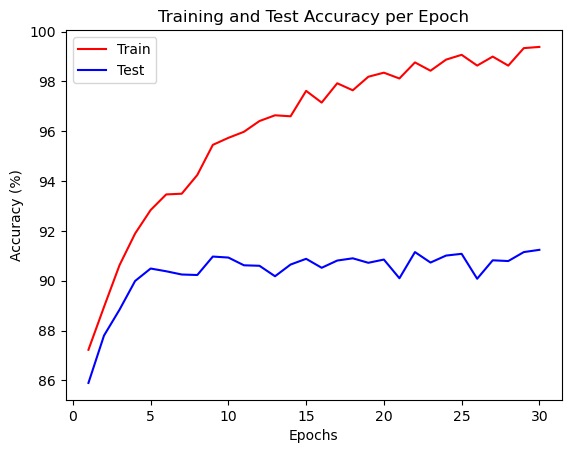

In [7]:
import matplotlib.pyplot as plt

#  plot of the accuracy on the training and test sets per each epoch
plt.plot(range(1, max_epochs + 1), train_accuracy, label='Train', color='red')
plt.plot(range(1, max_epochs + 1), test_accuracy, label='Test', color='blue')

# adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy per Epoch')
# show legend to distinguish between train and test accuracy
plt.legend()
plt.show()


2. (c) plot of the train loss per epoch (total sum of
per batch losses for each epoch) 

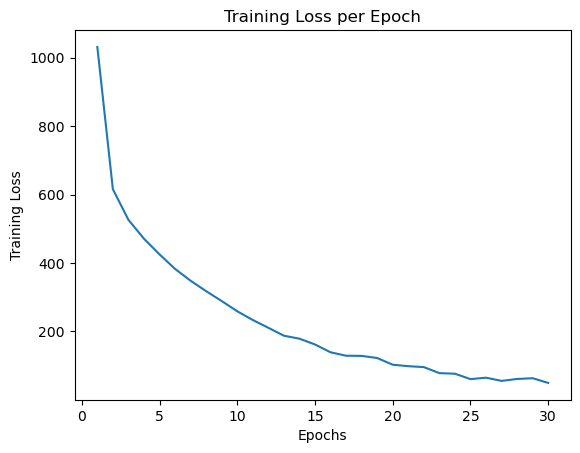

In [8]:
import matplotlib.pyplot as plt

#(c) plot of the train loss per epoch (total sum of per batch losses for each epoch) 
plt.plot(range(1, max_epochs + 1), loss_epoch_array, label='Train Loss')

# labels and title
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss per Epoch')
plt.show()


3.1 Experiment with Tanh Activation:.

In [9]:
# CNN implementation using Tanh , Code comments are not added as it is already avialble in first part of this notebook
#only diffrence is activation function is nn.Tanh()

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size=5, stride=1), nn.Tanh(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size=5, stride=1), nn.Tanh(), nn.MaxPool2d(2, stride=2))
        self.fcc_model = nn.Sequential(nn.Linear(1024, 1024), nn.Tanh(), nn.Linear(1024,256), nn.Tanh(), nn.Linear(256, 10))

    def forward(self, x):
        x = self.cnn_model(x)
        x =x.view(x.size(0), -1)
        x = self.fcc_model(x)
        return x

In [10]:
device = torch.device("cuda:0")

alpha = 0.1

net = MyCNN().to(device)
# initialise weights
net.apply(weights_init)

# Note: CrossEntropy loss is usually used for classification tasks
# check slide 23 of Lecture 8.2
loss_fn = nn.CrossEntropyLoss()
loss_fn.to(device)

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []
# loop over epochs
for epoch in range(max_epochs):
  # we will compute sum of batch losses per epoch
  loss_epoch = 0
  # loop over batches
  for i, data in enumerate(train_loader, 0):
    # to ensure the training mode is "turned on"
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()

  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))
final_train_accuracy = train_accuracy[-1]
final_test_accuracy = test_accuracy[-1]

print("Final Train Accuracy: {:.2f}%".format(final_train_accuracy))
print("Final Test Accuracy: {:.2f}%".format(final_test_accuracy))

Epoch 1: loss: 868.4083475843072, train accuracy: 87.775, valid accuracy:86.39
Epoch 2: loss: 591.9949483834207, train accuracy: 86.73, valid accuracy:85.24
Epoch 3: loss: 501.18853192962706, train accuracy: 91.02666666666667, valid accuracy:88.74
Epoch 4: loss: 439.3876314666122, train accuracy: 92.62, valid accuracy:89.76
Epoch 5: loss: 388.8221913455054, train accuracy: 93.245, valid accuracy:89.75
Epoch 6: loss: 344.19349277578294, train accuracy: 94.12333333333333, valid accuracy:89.65
Epoch 7: loss: 302.9616323779337, train accuracy: 94.65333333333334, valid accuracy:90.07
Epoch 8: loss: 265.4290434822906, train accuracy: 96.14166666666667, valid accuracy:90.47
Epoch 9: loss: 228.01622787653469, train accuracy: 96.59666666666666, valid accuracy:90.4
Epoch 10: loss: 191.35857794783078, train accuracy: 95.975, valid accuracy:89.63
Epoch 11: loss: 164.79081805364694, train accuracy: 97.595, valid accuracy:90.86
Epoch 12: loss: 138.8483958360739, train accuracy: 98.14666666666666, va

3.2 Experiment with Sigmoid Activation:

In [11]:
# CNN implementation using Sigmoid  Code comments are not added as it is already avialble in first part of this notebook
#only diffrence is activation function is nn.Sigmoid()

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size=5, stride=1), nn.Sigmoid(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size=5, stride=1), nn.Sigmoid(), nn.MaxPool2d(2, stride=2))
        self.fcc_model = nn.Sequential(nn.Linear(1024, 1024), nn.Sigmoid(), nn.Linear(1024,256), nn.Sigmoid(), nn.Linear(256, 10))

    def forward(self, x):
        x = self.cnn_model(x)
        x =x.view(x.size(0), -1)
        x = self.fcc_model(x)
        return x

In [12]:
device = torch.device("cuda:0")

alpha = 0.1

net = MyCNN().to(device)
# initialise weights
net.apply(weights_init)

# Note: CrossEntropy loss is usually used for classification tasks
# check slide 23 of Lecture 8.2
loss_fn = nn.CrossEntropyLoss()
loss_fn.to(device)

# SGD optimiser, learning rate is specified by alpha

opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []
# loop over epochs
for epoch in range(max_epochs):
  # we will compute sum of batch losses per epoch
  loss_epoch = 0
  # loop over batches
  for i, data in enumerate(train_loader, 0):
    # to ensure the training mode is "turned on"
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()

  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))
final_train_accuracy = train_accuracy[-1]
final_test_accuracy = test_accuracy[-1]

print("Final Train Accuracy: {:.2f}%".format(final_train_accuracy))
print("Final Test Accuracy: {:.2f}%".format(final_test_accuracy))

Epoch 1: loss: 4340.171792268753, train accuracy: 10.0, valid accuracy:10.0
Epoch 2: loss: 4286.910734534264, train accuracy: 24.873333333333335, valid accuracy:24.65
Epoch 3: loss: 1998.6498421132565, train accuracy: 64.69333333333333, valid accuracy:63.58
Epoch 4: loss: 1361.9209616184235, train accuracy: 71.65166666666667, valid accuracy:70.94
Epoch 5: loss: 1212.6299407333136, train accuracy: 75.28166666666667, valid accuracy:74.59
Epoch 6: loss: 1108.2812800705433, train accuracy: 79.365, valid accuracy:78.49
Epoch 7: loss: 1018.7444056421518, train accuracy: 80.28833333333333, valid accuracy:78.91
Epoch 8: loss: 946.4577450603247, train accuracy: 80.065, valid accuracy:79.22
Epoch 9: loss: 890.6850316375494, train accuracy: 81.81166666666667, valid accuracy:80.73
Epoch 10: loss: 844.2733184322715, train accuracy: 83.11833333333334, valid accuracy:82.51
Epoch 11: loss: 804.4554401189089, train accuracy: 85.325, valid accuracy:84.3
Epoch 12: loss: 770.2141343951225, train accuracy:

#

3.3 Experiment with ELU Activation:

In [13]:
# CNN implementation using ELU  Code comments are not added as it is already avialble in first part of this notebook
#only diffrence is activation function is nn.ELU()

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size=5, stride=1), nn.ELU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size=5, stride=1), nn.ELU(), nn.MaxPool2d(2, stride=2))
        self.fcc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ELU(), nn.Linear(1024,256), nn.ELU(), nn.Linear(256, 10))

    def forward(self, x):
        x = self.cnn_model(x)
        x =x.view(x.size(0), -1)
        x = self.fcc_model(x)
        return x

In [14]:
device = torch.device("cuda:0")

alpha = 0.1

net = MyCNN().to(device)
# initialise weights
net.apply(weights_init)

# Note: CrossEntropy loss is usually used for classification tasks
# check slide 23 of Lecture 8.2
loss_fn = nn.CrossEntropyLoss()
loss_fn.to(device)

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []
# loop over epochs
for epoch in range(max_epochs):
  # we will compute sum of batch losses per epoch
  loss_epoch = 0
  # loop over batches
  for i, data in enumerate(train_loader, 0):
    # to ensure the training mode is "turned on"
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()

  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))
final_train_accuracy = train_accuracy[-1]
final_test_accuracy = test_accuracy[-1]

print("Final Train Accuracy: {:.2f}%".format(final_train_accuracy))
print("Final Test Accuracy: {:.2f}%".format(final_test_accuracy))

Epoch 1: loss: 852.2190095186234, train accuracy: 87.79333333333334, valid accuracy:86.65
Epoch 2: loss: 586.0331817939878, train accuracy: 90.13, valid accuracy:88.29
Epoch 3: loss: 506.58023040369153, train accuracy: 90.8, valid accuracy:88.41
Epoch 4: loss: 449.0447947792709, train accuracy: 92.54, valid accuracy:89.72
Epoch 5: loss: 401.07057909853756, train accuracy: 94.06, valid accuracy:90.44
Epoch 6: loss: 358.9126777816564, train accuracy: 94.06, valid accuracy:90.25
Epoch 7: loss: 323.8901055143215, train accuracy: 94.87666666666667, valid accuracy:90.23
Epoch 8: loss: 289.42998486896977, train accuracy: 95.28166666666667, valid accuracy:90.26
Epoch 9: loss: 258.65041123575065, train accuracy: 95.015, valid accuracy:89.35
Epoch 10: loss: 232.23509455053136, train accuracy: 93.34333333333333, valid accuracy:88.6
Epoch 11: loss: 206.0140471420018, train accuracy: 95.95166666666667, valid accuracy:90.38
Epoch 12: loss: 184.73666342929937, train accuracy: 94.64666666666666, valid

4. Keeping ReLU, use 5 different learning rates: 0.001, 0.1, 0.5, 1, 10. In your report, provide the
final train loss, as well as the final accuracy values for both train and test for each learning rate
and comment on the trade-offs between speed and stability of convergence. Comment on why
you get the Nan loss if any

In [15]:
# Keeping the first CNN implementation using ReLU activation function

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size=5, stride=1), nn.ReLU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size=5, stride=1), nn.ReLU(), nn.MaxPool2d(2, stride=2))
        self.fcc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU(), nn.Linear(1024,256), nn.ReLU(), nn.Linear(256, 10))

    def forward(self, x):
        x = self.cnn_model(x)
        x =x.view(x.size(0), -1)
        x = self.fcc_model(x)
        return x

In [16]:
device = torch.device("cuda:0")
#use 5 different learning rates: 0.001, 0.1, 0.5, 1, 10.
learning_rates = [0.001, 0.1, 0.5, 1, 10]

for alpha in learning_rates:

    net = MyCNN().to(device)
    # initialise weights
    net.apply(weights_init)

    # Note: CrossEntropy loss is usually used for classification tasks
    # check slide 23 of Lecture 8.2
    loss_fn = nn.CrossEntropyLoss()
    loss_fn.to(device)

    # SGD optimiser, learning rate is specified by alpha
    opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

    loss_epoch_array = []
    max_epochs = 30
    loss_epoch = 0
    train_accuracy = []
    test_accuracy = []
    # loop over epochs
    for epoch in range(max_epochs):
      # we will compute sum of batch losses per epoch
      loss_epoch = 0
      # loop over batches
      for i, data in enumerate(train_loader, 0):
        # to ensure the training mode is "turned on"
        net.train()
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the gradients
        opt.zero_grad()
        outputs = net(inputs)
        # compute the loss
        loss = loss_fn(outputs, labels)
        # calculate the gradients
        loss.backward()
        # update the parameters using the gradients and optimizer algorithm
        opt.step()
        # we sum the loss over batches
        loss_epoch += loss.item()

      loss_epoch_array.append(loss_epoch)
      train_accuracy.append(evaluation(train_loader))
      test_accuracy.append(evaluation(test_loader))
      print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))
    final_train_accuracy = train_accuracy[-1]
    final_test_accuracy = test_accuracy[-1]
    print("Learning rate {}".format(alpha))
    final_loss = loss_epoch_array[-1]
    print("Final Train Accuracy: {:.2f}%".format(final_train_accuracy))
    print("Final Test Accuracy: {:.2f}%".format(final_test_accuracy))
    print("Final Loss: {:.4f}".format(final_loss))

Epoch 1: loss: 3341.428623199463, train accuracy: 65.34833333333333, valid accuracy:64.68
Epoch 2: loss: 1557.8032975494862, train accuracy: 71.98333333333333, valid accuracy:71.38
Epoch 3: loss: 1347.1901633143425, train accuracy: 73.25, valid accuracy:72.37
Epoch 4: loss: 1245.8510293066502, train accuracy: 76.23166666666667, valid accuracy:75.32
Epoch 5: loss: 1171.7227867394686, train accuracy: 77.16666666666667, valid accuracy:75.88
Epoch 6: loss: 1116.133767157793, train accuracy: 78.585, valid accuracy:77.5
Epoch 7: loss: 1071.423225030303, train accuracy: 80.225, valid accuracy:78.99
Epoch 8: loss: 1031.0313956141472, train accuracy: 78.58333333333333, valid accuracy:77.23
Epoch 9: loss: 994.4522816836834, train accuracy: 81.18166666666667, valid accuracy:80.61
Epoch 10: loss: 960.354105040431, train accuracy: 82.15666666666667, valid accuracy:81.32
Epoch 11: loss: 933.9328990355134, train accuracy: 80.47333333333333, valid accuracy:79.63
Epoch 12: loss: 908.6719119995832, trai

5. Add a dropout of 0.3 rate on the second fully connected layer (keeping ReLU and learning rate
0.1). In your report, provide the final train and test accuracy values and explain how the dropout
affects the performance.

In [17]:
# CNN implementation keeping ReLU and learning rate 0.1). 
#added nn.Dropout(0.3) on the second fully connected layer after activation function

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size=5, stride=1), nn.ReLU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size=5, stride=1), nn.ReLU(), nn.MaxPool2d(2, stride=2))
        #added nn.Dropout(0.3) on the second fully connected layer after activation function
        self.fcc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU(), nn.Linear(1024,256), nn.ReLU(), nn.Dropout(0.3), nn.Linear(256, 10))

    def forward(self, x):
        x = self.cnn_model(x)
        x =x.view(x.size(0), -1)
        x = self.fcc_model(x)
        return x

In [18]:
device = torch.device("cuda:0")

alpha = 0.1

net = MyCNN().to(device)
# initialise weights
net.apply(weights_init)

# Note: CrossEntropy loss is usually used for classification tasks
# check slide 23 of Lecture 8.2
loss_fn = nn.CrossEntropyLoss()
loss_fn.to(device)

# SGD optimiser, learning rate is specified by alpha
opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []
# loop over epochs
for epoch in range(max_epochs):
  # we will compute sum of batch losses per epoch
  loss_epoch = 0
  # loop over batches
  for i, data in enumerate(train_loader, 0):
    # to ensure the training mode is "turned on"
    net.train()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the gradients
    opt.zero_grad()
    outputs = net(inputs)
    # compute the loss
    loss = loss_fn(outputs, labels)
    # calculate the gradients
    loss.backward()
    # update the parameters using the gradients and optimizer algorithm
    opt.step()
    # we sum the loss over batches
    loss_epoch += loss.item()

  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  test_accuracy.append(evaluation(test_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))
final_train_accuracy = train_accuracy[-1]
final_test_accuracy = test_accuracy[-1]

print("Final Train Accuracy: {:.2f}%".format(final_train_accuracy))
print("Final Test Accuracy: {:.2f}%".format(final_test_accuracy))

Epoch 1: loss: 1043.4363205879927, train accuracy: 87.04333333333334, valid accuracy:86.23
Epoch 2: loss: 644.0935765169561, train accuracy: 89.31666666666666, valid accuracy:87.83
Epoch 3: loss: 552.1991786174476, train accuracy: 89.97166666666666, valid accuracy:88.11
Epoch 4: loss: 497.42754157818854, train accuracy: 91.34166666666667, valid accuracy:89.21
Epoch 5: loss: 452.54000296257436, train accuracy: 92.365, valid accuracy:89.76
Epoch 6: loss: 415.4623887166381, train accuracy: 93.02166666666666, valid accuracy:90.32
Epoch 7: loss: 382.3422557255253, train accuracy: 93.60666666666667, valid accuracy:90.66
Epoch 8: loss: 347.5324309710413, train accuracy: 93.89166666666667, valid accuracy:90.52
Epoch 9: loss: 324.0043580266647, train accuracy: 94.13666666666667, valid accuracy:90.44
Epoch 10: loss: 297.51593934884295, train accuracy: 93.41166666666666, valid accuracy:89.64
Epoch 11: loss: 272.3766929828562, train accuracy: 95.49166666666666, valid accuracy:90.78
Epoch 12: loss: